#DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/train-chennai-sale.csv')
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7108 non-null   float64       
 6   N_BATHROOM     7104 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

DEALING WITH NULL VALUES

In [3]:
print('Duplicates present in data: ', df.duplicated().sum())
print("As we have corrected the datatypes and there are no null/duplicate values anymore, we can proceed for data pre-processing.")

Duplicates present in data:  0
As we have corrected the datatypes and there are no null/duplicate values anymore, we can proceed for data pre-processing.


#DATA ENGINEERING

In [4]:
df['AGE'] = df.DATE_SALE - df.DATE_BUILD
df.AGE = df.AGE.dt.components.days

In [5]:
df.drop('PRT_ID',axis=1,inplace=True)

In [6]:
df['MZZONE'] = df['MZZONE'].str.lower()
df.MZZONE.value_counts()

rl    1858
rh    1822
rm    1817
c      550
a      537
i      525
Name: MZZONE, dtype: int64

In [7]:
df['AREA'] = df['AREA'].str.lower()
df['AREA'] = df['AREA'].str.replace('chrompet','chromepet')
df['AREA'] = df['AREA'].str.replace('chrompt','chromepet')
df['AREA'] = df['AREA'].str.replace('chrmpet','chromepet')
df['AREA'] = df['AREA'].str.replace('chormpet','chromepet')
df['AREA'] = df['AREA'].str.replace('chormpet','chromepet')

df['AREA'] = df['AREA'].str.replace('ann nagar','anna nagar')
df['AREA'] = df['AREA'].str.replace('ana nagar','anna nagar')

df['AREA'] = df['AREA'].str.replace('tnagar','t nagar')
df['AREA'] = df['AREA'].str.replace('kknagar','kk nagar')
df['AREA'] = df['AREA'].str.replace('karapakam','karapakkam')
df['AREA'] = df['AREA'].str.replace('adyr','adyar')
df['AREA'] = df['AREA'].str.replace('velchery','velachery')
df.AREA.value_counts()

chromepet     1702
karapakkam    1366
kk nagar       997
velachery      981
anna nagar     788
adyar          774
t nagar        501
Name: AREA, dtype: int64

In [8]:
df['PARK_FACIL'] = df['PARK_FACIL'].str.lower()
df['PARK_FACIL'] = df['PARK_FACIL'].str.replace('noo','no')
df['PARK_FACIL'] = df['PARK_FACIL'].map({'yes':1,'no':0})
df.PARK_FACIL.value_counts()

1    3587
0    3522
Name: PARK_FACIL, dtype: int64

In [9]:
df['SALE_COND'] = df['SALE_COND'].str.lower()
df['SALE_COND'] = df['SALE_COND'].str.replace('partiall','partial')
df['SALE_COND'] = df['SALE_COND'].str.replace('ab normal','abnormal')
df['SALE_COND'] = df['SALE_COND'].str.replace('adj land','adjland')
df.SALE_COND.value_counts()

adjland        1439
partial        1433
normal sale    1423
abnormal       1411
family         1403
Name: SALE_COND, dtype: int64

In [10]:
df['STREET'] = df['STREET'].str.lower()
df['STREET'] = df['STREET'].str.replace('pavd','paved')
df['STREET'] = df['STREET'].str.replace('noaccess','no access')
df.STREET.value_counts()

paved        2572
gravel       2520
no access    2017
Name: STREET, dtype: int64

In [11]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.lower()
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.replace('all pub','allpub')
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.replace('nosewr','nosewer')
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.replace('nosewa','nosewer')
# df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.replace('nosewer','nosewer')
df.UTILITY_AVAIL.value_counts()

allpub      1887
nosewer     1871
nosewer     1829
elo         1522
Name: UTILITY_AVAIL, dtype: int64

In [12]:
df['BUILDTYPE'] = df['BUILDTYPE'].str.lower()
df['BUILDTYPE'] = df['BUILDTYPE'].str.replace('other','others')
df['BUILDTYPE'] = df['BUILDTYPE'].str.replace('otherss','others')
df['BUILDTYPE'] = df['BUILDTYPE'].str.replace('comercial','commercial')
df.BUILDTYPE.value_counts()

house         2444
others        2336
commercial    2329
Name: BUILDTYPE, dtype: int64

#EDA

In [13]:
# corr = df.corr()
# fig, ax = plt.subplots(figsize=(40, 40))
# sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
# plt.xticks(range(len(corr.columns)), corr.columns);
# plt.yticks(range(len(corr.columns)), corr.columns)
# plt.show()

In [14]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE'],
      dtype='object')

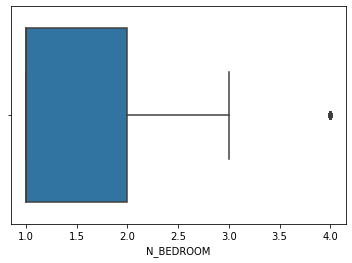

In [15]:
sns.boxplot(x=df.N_BEDROOM)

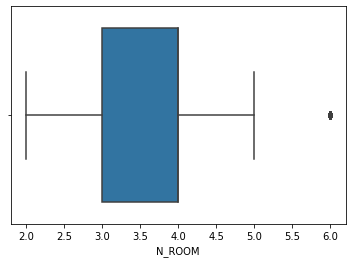

In [16]:
sns.boxplot(x=df.N_ROOM)

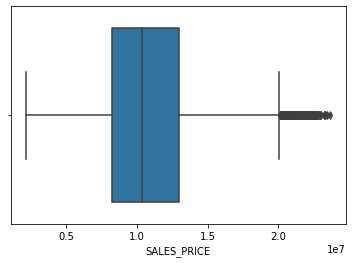

In [17]:
sns.boxplot(x=df.SALES_PRICE)

In [18]:
# sns.barplot(y=sort_values(by=/df.AREA, x=df.SALES_PRICE)
# ye vaaaaaaaaalaaaaa...........do lable encoding for area cat col

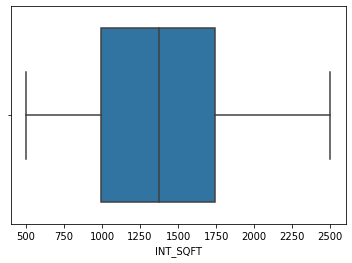

In [19]:
sns.boxplot(x=df.INT_SQFT)

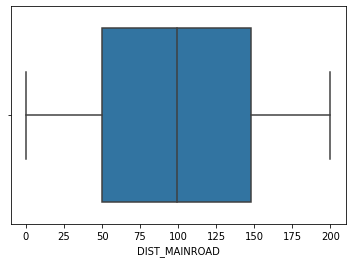

In [20]:
sns.boxplot(x=df.DIST_MAINROAD)

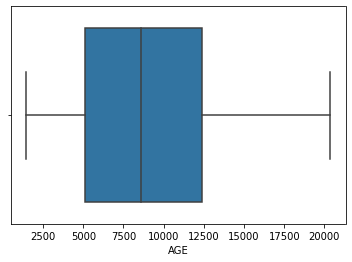

In [21]:
sns.boxplot(x=df.AGE)

In [22]:
# plt.figure(figsize=(20,6)) 
# sns.lineplot(y=df.AGE, x=df.SALES_PRICE)
# plt.show()

In [23]:
# sns.barplot(x=df.SALES_PRICE, y=df.PARK_FACIL.any())

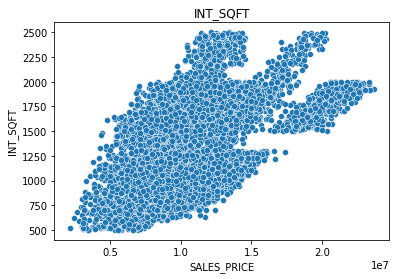

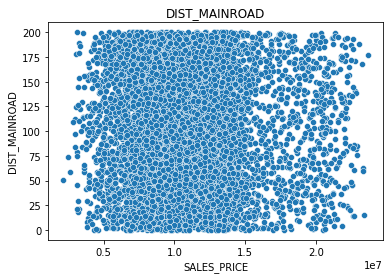

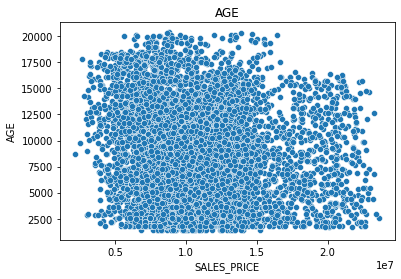

In [24]:
col1 = ['INT_SQFT', 'DIST_MAINROAD', 'AGE']

col2 = ['oh_adyar','oh_anna nagar', 'oh_chromepet', 'oh_karapakkam', 'oh_kk nagar']
      #  'oh_t nagar', 'oh_velachery', 'oh_abnormal', 'oh_adjland', 'oh_family',
      #  'oh_normal sale', 'oh_partial', 'oh_commercial',
      #  'oh_house', 'oh_others', 'oh_allpub', 'oh_elo', 'oh_nosewer',
      #  'oh_nosewer ', 'oh_gravel', 'oh_no access', 'oh_paved', 'oh_a', 'oh_c',
      #  'oh_i', 'oh_rh', 'oh_rl', 'oh_rm', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
      #  'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM']

col3 = ['PARK_FACIL', 'PARK_FACIL']

for i in col1:
  sns.scatterplot(x=df['SALES_PRICE'],y=df[i])
  plt.title(i)
  plt.show()

In [25]:
# for i in col2:
#   sns.scatterplot(x=df['SALES_PRICE'],y=(df[i]))
#   plt.title(i)
#   plt.show()

#Seperate

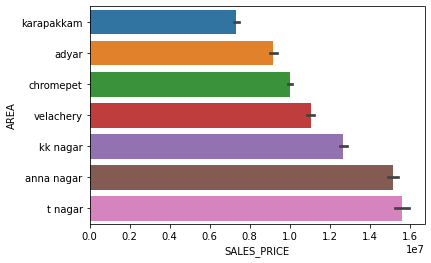

In [26]:
dff=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(y=df.AREA,x=df.SALES_PRICE,order=dff)

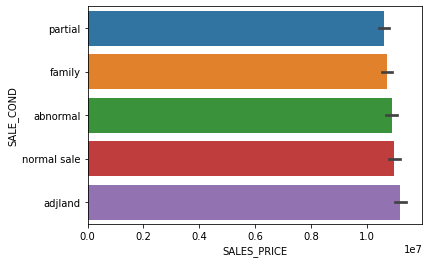

In [27]:
dff = pd.DataFrame()
dff=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(y=df.SALE_COND,x=df.SALES_PRICE,order=dff)

In [28]:

# sns.boxplot(y=df.PARK_FACIL,x=df.SALES_PRICE)

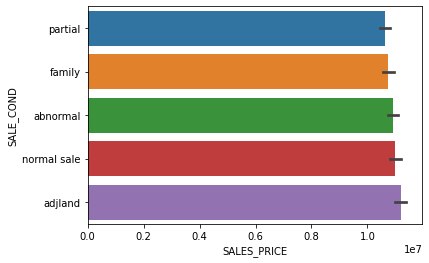

In [29]:
dff = pd.DataFrame()
dff=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(y=df.SALE_COND,x=df.SALES_PRICE,order=dff)

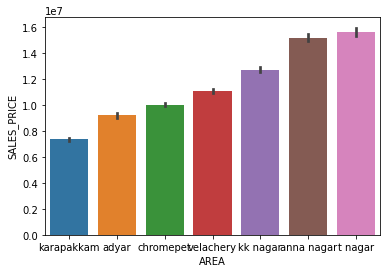

In [30]:
dff = pd.DataFrame()
dff=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=dff)

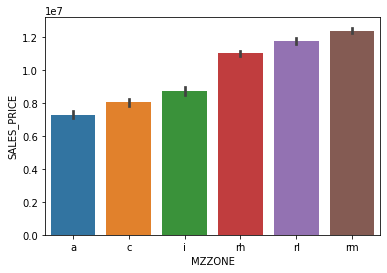

In [31]:
dff = pd.DataFrame()
dff=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=dff)

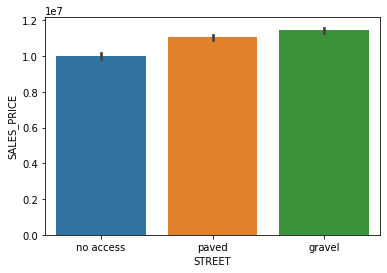

In [32]:
dff = pd.DataFrame()
dff=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=dff)

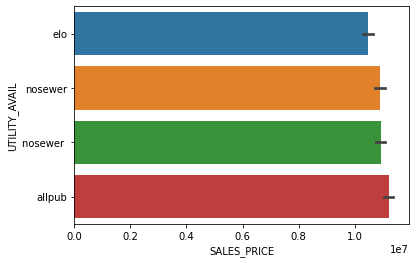

In [33]:
dff = pd.DataFrame()
dff=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(y=df.UTILITY_AVAIL,x=df.SALES_PRICE,order=dff)

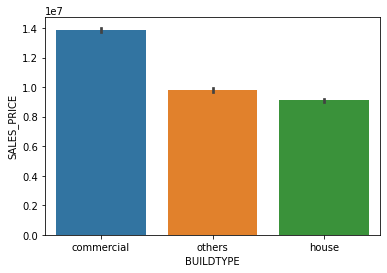

In [34]:
sns.barplot(y=df.SALES_PRICE, x= df.BUILDTYPE)

In [35]:
#OBJECT TYPES

# oh = pd.get_dummies(df[['SALE_COND']],prefix='oh')  #label
# oh = pd.get_dummies(df[['PARK_FACIL']],prefix='oh') #label
oh1 = pd.get_dummies(df[['AREA']],prefix='oh')      
oh2 = pd.get_dummies(df[['BUILDTYPE']],prefix='oh')     
oh3 = pd.get_dummies(df[['UTILITY_AVAIL']],prefix='oh') 
oh4 = pd.get_dummies(df[['STREET']],prefix='oh')    
oh5 = pd.get_dummies(df[['MZZONE']],prefix='oh')    
# INTEGER TYPES
int1 = pd.get_dummies(df[['N_BEDROOM']],prefix='oh')
int2 = pd.get_dummies(df[['N_BATHROOM']],prefix='oh')
int3 = pd.get_dummies(df[['N_ROOM']],prefix='oh')
#EXPERIMENTAL
exp1 = pd.get_dummies(df[['QS_ROOMS']],prefix='oh')
exp2 = pd.get_dummies(df[['QS_BATHROOM']],prefix='oh')
exp3 = pd.get_dummies(df[['QS_BEDROOM']],prefix='oh')

df['SALE_COND_label'] = df.SALE_COND.map({'partial':0, 'family':1, 'abnormal':2, 'normal sale':3,'adjland':4})

In [36]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE', 'SALE_COND_label'],
      dtype='object')

In [37]:
model_df = pd.DataFrame()
model_df = df[['INT_SQFT', 'DIST_MAINROAD', 'SALE_COND_label', 'PARK_FACIL','AGE']].copy()
model_df = pd.concat([model_df,oh1,oh2,oh3,oh4,oh5,int1,int2,int3,exp1,exp2,exp3],axis=1)
model_df['SALES_PRICE'] = df['SALES_PRICE'].copy()

In [38]:
#Imputing leftover null values with mode
model_df.N_BEDROOM = model_df.N_BEDROOM.fillna(model_df.N_BEDROOM.mode()[0])
model_df.N_BATHROOM = model_df.N_BATHROOM.fillna(model_df.N_BATHROOM.mode()[0])

In [39]:
X = model_df[['INT_SQFT', 'DIST_MAINROAD', 'SALE_COND_label', 'PARK_FACIL', 'AGE',
       'oh_adyar', 'oh_anna nagar', 'oh_chromepet', 'oh_karapakkam',
       'oh_kk nagar', 'oh_t nagar', 'oh_velachery', 'oh_commercial',
       'oh_house', 'oh_others', 'oh_allpub', 'oh_elo', 'oh_nosewer',
       'oh_nosewer ', 'oh_gravel', 'oh_no access', 'oh_paved', 'oh_a', 'oh_c',
       'oh_i', 'oh_rh', 'oh_rl', 'oh_rm', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM']]
y = model_df['SALES_PRICE']

In [40]:
import statsmodels.api as sm
XX=sm.add_constant(X)
model = sm.OLS(y,X)

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     5540.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:57:44   Log-Likelihood:            -1.0648e+05
No. Observations:                7109   AIC:                         2.130e+05
Df Residuals:                    7079   BIC:                         2.132e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
INT_SQFT         3889.1374     85.843     

**SPLITTING**

In [41]:
X = X.values
y = y.values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**SCALING**

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Prediction Models

##Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor(n_estimators = 350, random_state = 2)
rf_regressor.fit(X_train, y_train)

cv_rf = cross_val_score(estimator = rf_regressor, X = X_train, y = y_train, cv = 10)

y_pred_rf_train = rf_regressor.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_regressor.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting MSE the Test set results
mse_rf = mean_squared_error(y_test, y_pred_rf_test)
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("MSE: ", mse_rf)

CV:  0.9821594824419799
R2_score (train):  0.9977352190791934
R2_score (test):  0.9845086063660193
MSE:  223857532392.1854


##Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

steps = [
          ('poly', PolynomialFeatures(degree=2)),
          ('model', LinearRegression(fit_intercept=True))
        ]

lin_regressor = Pipeline(steps)
lin_regressor.fit(X_train, y_train)

#Applying Cross validation on train data
cv_lin_regressor = cross_val_score(estimator = lin_regressor, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_linear_train = lin_regressor.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = lin_regressor.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting MSE on the Test set results
mse_lin_regressor = mean_squared_error(y_test, y_pred_linear_test)
print('CV: ', cv_lin_regressor.mean())
print('R2_score (train): {}  ------------> {}%'.format(r2_score_linear_train,r2_score_linear_train*100))
print('R2_score (test) : {}  ------------> {}%'.format(r2_score_linear_test,r2_score_linear_test*100))
print("MSE: ", mse_lin_regressor)

CV:  0.9995472202525374
R2_score (train): 0.9996171351408124  ------------> 99.96171351408124%
R2_score (test) : 0.9995133475743623  ------------> 99.95133475743623%
MSE:  7032344133.1293955


##Ridge Regression

In [69]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

steps = [
          ('poly', PolynomialFeatures(degree=2)),
          ('modell', Ridge(alpha=.02, fit_intercept=True))
        ]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

#Applying Cross validation on train data
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting MSE the Test set results
mse_ridge = mean_squared_error(y_test, y_pred_ridge_test)
print('CV: ', cv_ridge.mean())
print('R2_score (train): {}  ------------> {}%'.format(r2_score_ridge_train,r2_score_ridge_train*100))
print('R2_score (test) : {}  ------------> {}%'.format(r2_score_ridge_test,r2_score_ridge_test*100))
print("MSE: ", mse_ridge)

CV:  0.9995488767390087
R2_score (train): 0.9996179284379177  ------------> 99.96179284379177%
R2_score (test) : 0.9995131975384198  ------------> 99.95131975384199%
MSE:  7034512219.272037


##Lasso Regression

In [70]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

steps = [
          ('poly', PolynomialFeatures(degree=2)),
          ('modelll', Lasso(alpha=0.013, fit_intercept=True))
        ]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting MSE the Test set results
mse_lasso = mean_squared_error(y_test, y_pred_lasso_test)
print('CV: ', cv_lasso.mean())
print('R2_score (train): {}  ------------> {}%'.format(r2_score_lasso_train,r2_score_lasso_train*100))
print('R2_score (test) : {}  ------------> {}%'.format(r2_score_lasso_test,r2_score_lasso_test*100))
print("MSE: ", mse_lasso)

CV:  0.9995488883302658
R2_score (train): 0.9996178551671134  ------------> 99.96178551671134%
R2_score (test) : 0.9995130556309725  ------------> 99.95130556309725%
MSE:  7036562845.040279


##Gradient Boost Regression

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

predicted = gbr.predict(X_test)
expected = y_test
cv_gbr = cross_val_score(estimator = gbr, X = X_train, y = y_train, cv = 10)
y_pred_gbr_train = gbr.predict(X_train)
r2_score_gbr_train = r2_score(y_train, y_pred_gbr_train)

# Predicting R2 Score the Test set results
y_pred_gbr_test = gbr.predict(X_test)
r2_score_gbr_test = r2_score(y_test, y_pred_gbr_test)

# Predicting MSE the Test set results
mse_gbr = mean_squared_error(y_test, y_pred_gbr_test)
print('CV: ', cv_gbr.mean())
print('R2_score (train): ', r2_score_gbr_train)
print('R2_score (test): ', r2_score_gbr_test)
print("MSE: ", mse_gbr)
gbr.score(X_test,y_test)

CV:  0.9888798341508901
R2_score (train):  0.9907210738025158
R2_score (test):  0.9889639105680432
MSE:  159476403858.08795


0.9889639105680432

##Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
regressor_dt = DecisionTreeRegressor(max_depth=4, random_state = 0)
regressor_dt.fit(X_train, y_train)


# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting MSE the Test set results
mse_dt = mean_squared_error(y_test, y_pred_dt_test)
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("MSE: ", mse_dt)

CV:  0.843566658881783
R2_score (train):  0.8484226553648417
R2_score (test):  0.8515606117385022
MSE:  2145015222719.2441


##XG Boost Regression


In [73]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np

xgb_regressor = xgb.XGBRegressor(learning_rate =.11, n_estimators=100, verbosity = 0, random_state=0) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model
xgb_regressor.score(X_test, y_test) # scoring the model - r2 squared
xgbr_cross_val_score = np.mean(cross_val_score(xgb_regressor, X_train, y_train, cv=10))
print("Learning rate : ", .11)

y_pred_xgbr_train = xgb_regressor.predict(X_train)
r2_score_xgbr_train = r2_score(y_train, y_pred_xgbr_train)

y_pred_xgbr_test = xgb_regressor.predict(X_test)
r2_score_xgbr_test = r2_score(y_test, y_pred_xgbr_test)

mse_xgbr = mean_squared_error(y_test, y_pred_xgbr_test)
print('CV: ', xgbr_cross_val_score)
print('R2_score (train): ', r2_score_xgbr_train)
print('R2_score (test): ', r2_score_xgbr_test)
print("MSE: ", mse_xgbr)

Learning rate :  0.11
CV:  0.990394040416637
R2_score (train):  0.99247775037419
R2_score (test):  0.9907705872836828
MSE:  133369121263.03763


#Evaluating Models' Performance

In [74]:
models = [('Linear Regression', mse_lin_regressor, r2_score_linear_train, r2_score_linear_test, cv_lin_regressor.mean()),
          ('Ridge Regression', mse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', mse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Random Forest Regression', mse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()),
          ('Decision Tree Regression', mse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('GB Regression', mse_gbr, r2_score_gbr_train, r2_score_gbr_test, cv_gbr.mean()),
          ('XGB Regression', mse_xgbr, r2_score_xgbr_train, r2_score_xgbr_test, xgbr_cross_val_score)   
         ]
Table = pd.DataFrame(data = models, columns=['Model', 'MSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
Table

,Model,MSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,7.032344e+09,0.999617,0.999513,0.999547
1,Ridge Regression,7.034512e+09,0.999618,0.999513,0.999549
2,Lasso Regression,7.036563e+09,0.999618,0.999513,0.999549
3,Random Forest Regression,2.238575e+11,0.997735,0.984509,0.982159
4,Decision Tree Regression,2.145015e+12,0.848423,0.851561,0.843567
5,GB Regression,1.594764e+11,0.990721,0.988964,0.988880
6,XGB Regression,1.333691e+11,0.992478,0.990771,0.990394


In [75]:
model_df.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'SALE_COND_label', 'PARK_FACIL', 'AGE',
       'oh_adyar', 'oh_anna nagar', 'oh_chromepet', 'oh_karapakkam',
       'oh_kk nagar', 'oh_t nagar', 'oh_velachery', 'oh_commercial',
       'oh_house', 'oh_others', 'oh_allpub', 'oh_elo', 'oh_nosewer',
       'oh_nosewer ', 'oh_gravel', 'oh_no access', 'oh_paved', 'oh_a', 'oh_c',
       'oh_i', 'oh_rh', 'oh_rl', 'oh_rm', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM'],
      dtype='object')

In [76]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['INT_SQFT', 'DIST_MAINROAD', 'SALE_COND_label', 'PARK_FACIL', 'AGE',
       'oh_adyar', 'oh_anna nagar', 'oh_chromepet', 'oh_karapakkam',
       'oh_kk nagar', 'oh_t nagar', 'oh_velachery', 'oh_commercial',
       'oh_house', 'oh_others', 'oh_allpub', 'oh_elo', 'oh_nosewer',
       'oh_nosewer ', 'oh_gravel', 'oh_no access', 'oh_paved', 'oh_a', 'oh_c',
       'oh_i', 'oh_rh', 'oh_rl', 'oh_rm', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'SALES_PRICE'],selector.support_))

[('INT_SQFT', False),
 ('DIST_MAINROAD', False),
 ('SALE_COND_label', False),
 ('PARK_FACIL', False),
 ('AGE', False),
 ('oh_adyar', False),
 ('oh_anna nagar', False),
 ('oh_chromepet', False),
 ('oh_karapakkam', False),
 ('oh_kk nagar', False),
 ('oh_t nagar', False),
 ('oh_velachery', False),
 ('oh_commercial', True),
 ('oh_house', True),
 ('oh_others', True),
 ('oh_allpub', False),
 ('oh_elo', False),
 ('oh_nosewer', False),
 ('oh_nosewer ', False),
 ('oh_gravel', False),
 ('oh_no access', False),
 ('oh_paved', False),
 ('oh_a', False),
 ('oh_c', False),
 ('oh_i', False),
 ('oh_rh', False),
 ('oh_rl', False),
 ('oh_rm', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False)]

In [77]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['INT_SQFT', 'DIST_MAINROAD', 'SALE_COND_label', 'PARK_FACIL', 'AGE',
       'oh_adyar', 'oh_anna nagar', 'oh_chromepet', 'oh_karapakkam',
       'oh_kk nagar', 'oh_t nagar', 'oh_velachery', 'oh_commercial',
       'oh_house', 'oh_others', 'oh_allpub', 'oh_elo', 'oh_nosewer',
       'oh_nosewer ', 'oh_gravel', 'oh_no access', 'oh_paved', 'oh_a', 'oh_c',
       'oh_i', 'oh_rh', 'oh_rl', 'oh_rm', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'SALES_PRICE'],sfs.get_support())))

[('INT_SQFT', True), ('DIST_MAINROAD', False), ('SALE_COND_label', False), ('PARK_FACIL', False), ('AGE', False), ('oh_adyar', False), ('oh_anna nagar', False), ('oh_chromepet', False), ('oh_karapakkam', False), ('oh_kk nagar', False), ('oh_t nagar', False), ('oh_velachery', False), ('oh_commercial', True), ('oh_house', False), ('oh_others', False), ('oh_allpub', False), ('oh_elo', False), ('oh_nosewer', False), ('oh_nosewer ', False), ('oh_gravel', False), ('oh_no access', False), ('oh_paved', False), ('oh_a', False), ('oh_c', False), ('oh_i', False), ('oh_rh', False), ('oh_rl', False), ('oh_rm', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('QS_ROOMS', False), ('QS_BATHROOM', False), ('QS_BEDROOM', False)]


In [78]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info

array([3.89705870e-01, 0.00000000e+00, 6.56765535e-03, 1.18591522e-02,
       2.33480485e-02, 1.80452584e-02, 1.00657168e-01, 7.01598872e-02,
       1.58297509e-01, 5.95395623e-02, 6.89828889e-02, 2.29393925e-02,
       1.84231536e-01, 8.72940679e-02, 3.12275384e-02, 2.71125630e-04,
       8.89821418e-03, 0.00000000e+00, 0.00000000e+00, 1.38284912e-02,
       2.41415342e-02, 0.00000000e+00, 6.04451507e-02, 3.27510586e-02,
       1.62726584e-02, 5.67434427e-03, 7.69622127e-03, 3.94727401e-02,
       1.67739191e-01, 3.79643794e-02, 2.97974375e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [79]:
new_df = pd.DataFrame()
new_df = model_df.copy()
# model_df.drop('SALES_PRICE',axis=1,inplace=True)
mutual_info = pd.Series(mutual_info)
mutual_info.index = new_df.columns
mutual_info.sort_values(ascending=False)

INT_SQFT           0.389706
N_ROOM             0.297974
oh_commercial      0.184232
N_BEDROOM          0.167739
oh_karapakkam      0.158298
oh_anna nagar      0.100657
oh_house           0.087294
oh_chromepet       0.070160
oh_t nagar         0.068983
oh_a               0.060445
oh_kk nagar        0.059540
oh_rm              0.039473
N_BATHROOM         0.037964
oh_c               0.032751
oh_others          0.031228
oh_no access       0.024142
AGE                0.023348
oh_velachery       0.022939
oh_adyar           0.018045
oh_i               0.016273
oh_gravel          0.013828
PARK_FACIL         0.011859
oh_elo             0.008898
oh_rl              0.007696
SALE_COND_label    0.006568
oh_rh              0.005674
oh_allpub          0.000271
QS_BATHROOM        0.000000
QS_ROOMS           0.000000
oh_nosewer         0.000000
oh_paved           0.000000
oh_nosewer         0.000000
DIST_MAINROAD      0.000000
QS_BEDROOM         0.000000
dtype: float64

In [80]:
new_df.shape

(7109, 34)

In [81]:
model_df.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'SALE_COND_label', 'PARK_FACIL', 'AGE',
       'oh_adyar', 'oh_anna nagar', 'oh_chromepet', 'oh_karapakkam',
       'oh_kk nagar', 'oh_t nagar', 'oh_velachery', 'oh_commercial',
       'oh_house', 'oh_others', 'oh_allpub', 'oh_elo', 'oh_nosewer',
       'oh_nosewer ', 'oh_gravel', 'oh_no access', 'oh_paved', 'oh_a', 'oh_c',
       'oh_i', 'oh_rh', 'oh_rl', 'oh_rm', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM'],
      dtype='object')